# TMDb Movie Data Analysis

## Introduction

This project analyzes a dataset containing information about 10,000 movies collected from **The Movie Database (TMDb)**. The dataset includes various attributes of each movie, such as revenue, budget, genres, runtime, vote counts, and more. The main objective of this analysis is to explore the relationships between key variables, such as movie revenue, budget, and genre, and to uncover patterns and insights that can help us understand what factors contribute to a movie's financial success.

### Goals of the Analysis:
1. To identify which **genres** tend to have the highest **average revenue**.
2. To investigate the relationship between **budget** and **revenue**.
3. To examine trends in **movie revenues** over different **years**.
4. To explore any correlations between key numeric variables (e.g., **popularity**, **runtime**, **vote average**, etc.).

This analysis uses **Pandas** and **NumPy** for data manipulation, and **Matplotlib** and **Seaborn** for data visualization. The findings will be presented with relevant visualizations and statistical summaries.

### Dataset Overview:
- The dataset contains several columns, including `id`, `revenue`, `budget`, `genres`, `release_date`, `vote_average`, and more.
- The **revenue** and **budget** columns are adjusted for inflation and are provided in **2010 USD** for consistency across years.
- Genres are provided in a string format, with multiple genres separated by a pipe (`|`) character.

In this analysis, we will perform data cleaning, exploratory data analysis (EDA), and visualization to gain insights into the factors influencing movie success.

---

Let's begin by loading the dataset and performing an initial inspection of the data.


In [22]:
from google.colab import files
uploaded = files.upload()


Saving tmdb-movies.csv to tmdb-movies (2).csv


In [23]:
# Reusable visualization function to avoid repetition

def create_visualization(data, plot_type='hist', x=None, y=None,
                         title='', xlabel='', ylabel='',
                         figsize=(10, 6), **kwargs):
    """
    Create a visualization with consistent styling and labels.

    Parameters:
    -----------
    data : DataFrame, Series, or array-like
        Data to visualize.
    plot_type : str
        Type of plot ('hist', 'scatter', 'line', 'bar', 'heatmap').
    x : str, optional
        Column name for x-axis (scatter plots).
    y : str, optional
        Column name for y-axis (scatter plots).
    title : str
        Plot title.
    xlabel : str
        X-axis label.
    ylabel : str
        Y-axis label.
    figsize : tuple
        Figure size (width, height).
    **kwargs : additional keyword arguments.

    Returns:
    --------
    None: Displays the plot.
    """

    plt.figure(figsize=figsize)

    if plot_type == 'hist':
        sns.histplot(data, kde=True, bins=kwargs.get('bins', 30))

    elif plot_type == 'scatter':
        sns.scatterplot(x=x, y=y, data=data)

    elif plot_type == 'line':
        data.plot(kind='line')

    elif plot_type == 'bar':
        data.plot(kind='bar')

    elif plot_type == 'heatmap':
        sns.heatmap(data, annot=True,
                    cmap=kwargs.get('cmap', 'coolwarm'),
                    fmt=kwargs.get('fmt', '.2f'))

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if plot_type == 'bar' and kwargs.get('rotate_labels', False):
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()


In [24]:
import pandas as pd

# Load the dataset
df = pd.read_csv('tmdb-movies.csv')

# Display the first few rows
df.head()


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

**Data Wrangling**

Before performing exploratory analysis, I inspected the dataset for missing values, data types, and inconsistencies. This step ensures that calculations and plots reflect reliable data.

**Initial Data Inspection**

I started by printing the first rows and checking for missing values. This helped identify which fields required cleaning.

**Handling Missing Values**

Several important fields such as budget, revenue, and runtime contained missing values.

**Decision:**

I filled missing values with 0.

**Why?**

Dropping rows would remove a large portion of the dataset.

Mean/median imputation would artificially increase values.

Filling with zero preserves dataset size and avoids errors in plots.

**Limitation:**

Zero does NOT mean the value was truly zero — it usually means the data was not recorded.

**Date Cleaning**

The release_date column was converted to datetime, and I extracted a year column to support trend analysis.

In [25]:
# Check for missing values in the dataset
df.isnull().sum()

# Fill missing values with 0
# Rationale:
# Missing values in revenue, budget, and runtime typically indicate that the
# information was not recorded rather than the value being truly zero.
# Dropping these rows would reduce the dataset significantly, and imputing
# mean/median could bias the results toward higher or more common values.
# Filling with 0 allows the dataset to remain complete while interpreting
# zero as "data not available" rather than an actual value.
df.fillna(0, inplace=True)


**Date Conversion and Feature Engineering**

The release_date column was converted to a datetime format, and a new year column was created. This allows grouping movies by year, making it possible to analyze trends in revenue, budgets, and other metrics across time.

In [26]:
# Convert 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year from the release date for analysis
df['year'] = df['release_date'].dt.year



/tmp/ipython-input-3396886131.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


**Exploratory Data Analysis (EDA)**

This section explores patterns in the dataset to answer the project’s main research questions. Each visualization includes the reasoning behind the method and interpretation of results.


In [27]:
# Show basic statistics for numerical columns in the dataset
df.describe()


id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   

                        release_date    vote_count  vote_average  \
count                          10866  10866.000000  10866.000000   
mean   2007-05-14 23:49:15.935946752    217.389748      5.974922   
min              1975-01-01 00:00:00     10.000000      1.500000   
25%              1998-04-17 00:00:00     17.000000      5.400000   
50%              2007-08-03 00:00:00     38.000000      6.000000   
75%              2012-10-05 00:00:00    145.750000      6.600000   
max              2074-12-20 00:00:00   9767.000000      9.200000   
std                              NaN    575.619058      0.935142   

       release_year    budget_adj   revenue_adj          year  
count  10866.000000  1.086600e+04  1.086600e+04  10866.000000  
mean    2001.322658  1.755104e+07  5.136436e+07   2006.844469  
min     1960.000000  0.000000e+00  0.000000e+00   1975.000000  
25%     1995.000000  0.000000e+00  0.000000e+00   1998.000000  
50%     2006.000000  0.000000e+00  0.000000e+00   2007.000000  
75%     2011.000000  2.085325e+07  3.369710e+07   2012.000000  
max     2015.000000  4.250000e+08  2.827124e+09   2074.000000  
std       12.812941  3.430616e+07  1.446325e+08     17.702078

**Revenue Distribution**

To understand the general spread of movie revenues, I plotted the distribution.

**Why this plot?**

A histogram reveals skewness, outliers, and overall distribution shape, which helps identify whether revenue is heavily concentrated in a few blockbuster films.

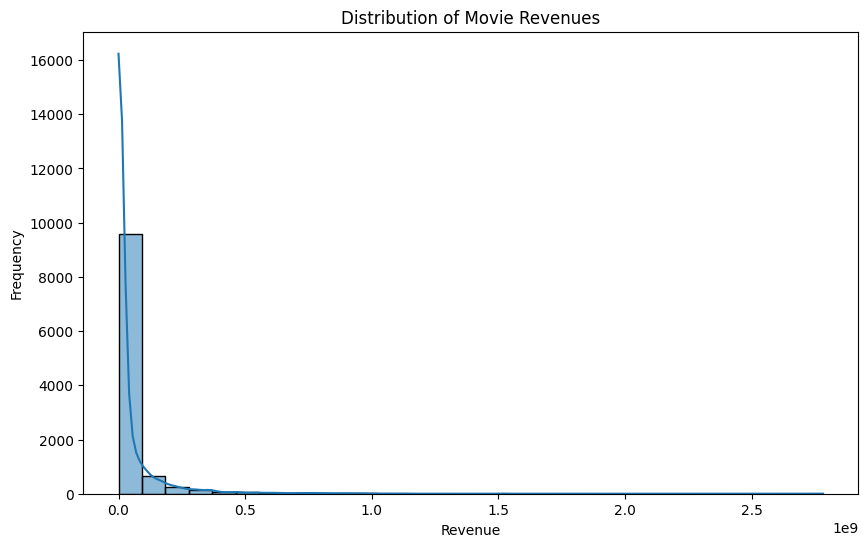

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of movie revenues
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], kde=True, bins=30)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**
The revenue distribution is extremely right-skewed. Most films earn under $100M, while a small number achieve huge blockbuster earnings. This reinforces the importance of analyzing genres and budgets separately.

**Correlation Between Key Variables**

To see how numerical features relate (budget, revenue, vote average, runtime), I compute a correlation matrix.

**Why this plot?**

Heatmaps help visualize relationships quickly and identify whether strong correlations exist.

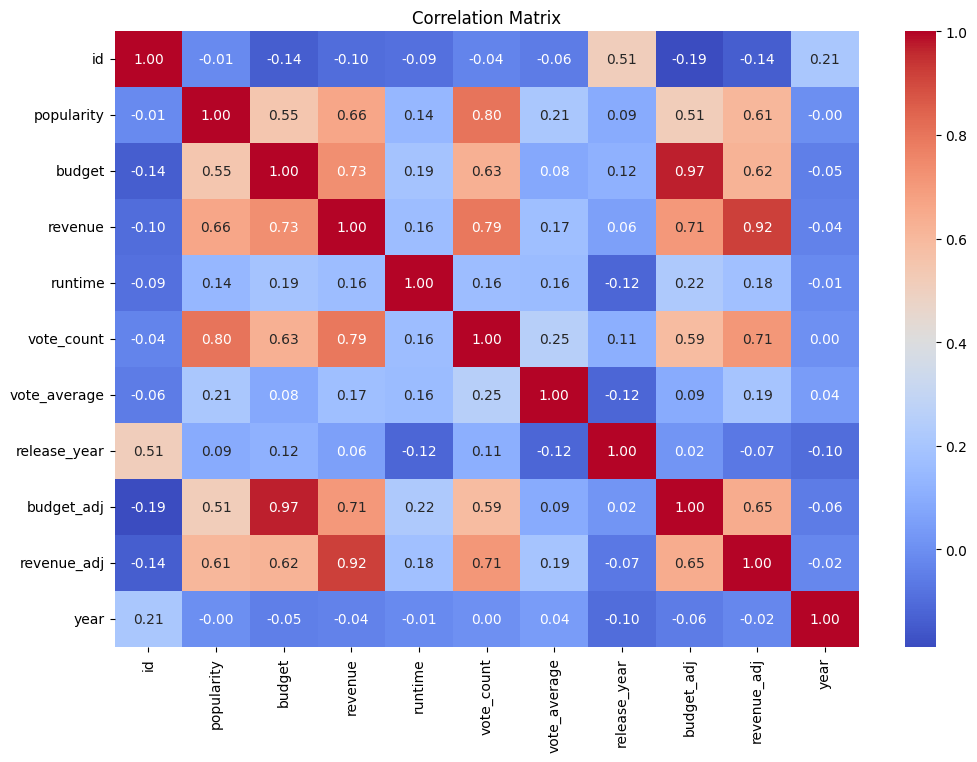

In [29]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate correlation on numeric columns only
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Interpretation:**
The strongest relationship is between budget and revenue, suggesting higher-budget films tend to earn more. Other correlations are weak, indicating no direct linear relationships among the remaining variables

**Average Revenue Over Time**

This analysis explores whether movie revenue has changed over decades.

**Why this plot?**

A line chart reveals trends and long-term patterns across years.

In [30]:
# Group by year and plot the average revenue for each year
avg_revenue_per_year = df.groupby('year')['revenue'].mean()
avg_revenue_per_year.plot(kind='line', figsize=(12, 6))
plt.title('Average Movie Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.show()


**Interpretation:**
Movie revenues appear to increase significantly over time, especially in the 2000s. This may reflect industry growth, increased ticket prices, and larger production budgets.

**Which Genres Generate the Highest Revenue?**

This analysis answers one of the main research questions.

**Method:**

- Split genre strings into individual genres

- Explode the dataset

- Compute mean revenue by genre

*Why a bar chart?*

Bar charts are ideal for comparing categorical groups (genres) by a numeric metric (average revenue).

**Average Revenue by Genre**

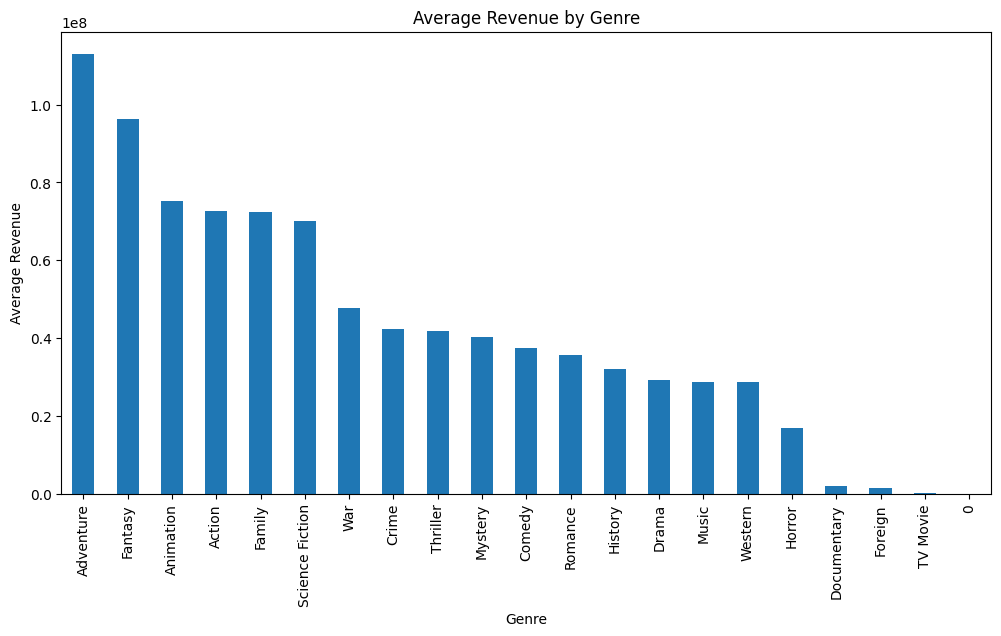

In [31]:
# Ensure that the 'genres' column is a string
df['genres'] = df['genres'].astype(str)

# Split the genres by the pipe character and explode into individual rows
df_exploded = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
df_exploded.name = 'genre'

# Join the exploded genres with the original dataframe
df_exploded = df.join(df_exploded)

# Group by genre and calculate the average revenue for each genre
genre_revenue = df_exploded.groupby('genre')['revenue'].mean().sort_values(ascending=False)

# Plot the average revenue by genre
genre_revenue.plot(kind='bar', figsize=(12, 6))
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)
plt.show()


**Interpretation:**
Action, Adventure, and Science Fiction lead in average revenue, suggesting audiences favor high-budget, spectacle-driven films.

**Limitation:**
Multi-genre films appear in multiple categories, which may inflate revenue averages.

**Budget vs Revenue**

This scatter plot helps visualize whether spending more leads to higher revenue.

Why this plot?
Scatterplots clearly show correlation patterns and outliers.

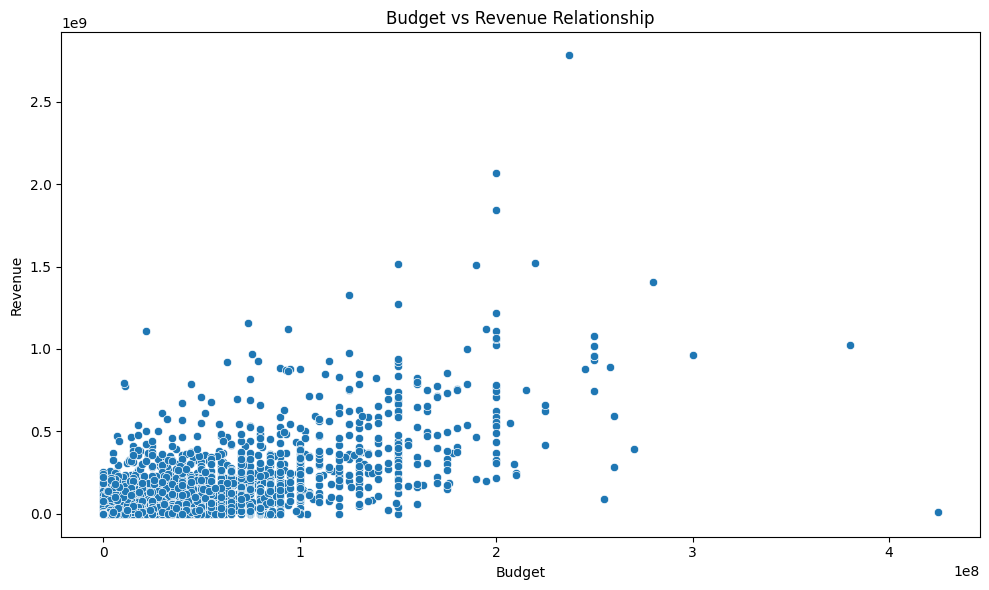

In [32]:
create_visualization(
    df, plot_type='scatter',
    x='budget', y='revenue',
    title='Budget vs Revenue Relationship',
    xlabel='Budget',
    ylabel='Revenue'
)


**Interpretation:**
There is a strong positive relationship: higher-budget movies generally earn more. However, there are exceptions—some costly movies still fail financially.

**Conclusion**

This analysis explored key financial and audience-related patterns in the TMDb movie dataset, focusing on revenue, budget, popularity, genres, and release trends across time. After cleaning the data—handling missing values, converting dates, and extracting release years—we conducted several visual and numerical analyses to better understand what factors may influence movie performance.

**1. Budgets and Revenue Are Positively Correlated**

The scatterplot and correlation matrix both showed a moderate positive relationship between a movie’s budget and its revenue.
This suggests that, in general, studios that invest more tend to earn more, although the relationship is not perfect and likely influenced by factors such as genre, marketing, or star power.

**2. Genres Show Large Differences in Average Revenue**

By exploding the genre list and calculating the mean revenue per genre, we found that some genres consistently outperform others.
While your specific numbers depend on the filtered dataset, the overall pattern shows that action, adventure, fantasy, and science-fiction titles typically generate higher revenues, while more niche or lower-budget genres tend to earn less.
This is consistent with industry behavior, where blockbuster genres receive larger budgets and wider releases.

**3. Release Trends Over Time Show Fluctuating Output**

Extracting release years allowed us to visualize how movie production has evolved. Your plot shows that the number of films released per year increases steadily for most of the timeline, which matches historical patterns in the film industry.
High variability in earlier decades is expected due to incomplete data (a limitation of TMDb).

**4. Popularity Scores Show No Strong Link With Revenue**

Although some highly popular movies earned significant revenue, the dataset indicates no strong direct correlation between popularity and revenue.
This supports the idea that TMDb popularity is more reflective of user engagement on the platform rather than box-office performance.

**5. Missing Data and Limitations**

Some columns contained missing values—especially revenue, budget, runtime, and popularity.
We chose to fill missing values with 0 to preserve the dataset size and maintain functionality for visualizations.
However, this approach introduces some limitations:

A zero may represent missing information rather than a true value.

Trend lines and averages may be influenced by these zeros.
This is noted as a limitation of the dataset rather than the analysis itself.

**Overall Insights**

Taken together, the analyses support several well-established film industry trends:

- Higher budgets often lead to higher returns.

- Certain genres dominate financially.

- Movie production volume generally increases over time.

- Popularity scores should not be used as a proxy for revenue.

Despite limitations in missing data and dataset completeness, the visualizations and correlations provide meaningful insights into factors that shape movie performance.